### Activity 9: Extracting the Top 100 eBooks from Gutenberg

#### 1. Import the necessary libraries, including regex and beautifulsoup.

In [1]:
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import ssl

#### 2. Check the SSL certificate.

In [2]:
# Ignore SSL certificate errors
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

#### 3. Read the HTML from the URL.

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
gutenberg_url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(gutenberg_url)

#### 4. Write a small function to check the status of the web request.

In [4]:
#Returning 0 for a success response and 1 for failures
def ApiStatus(response):
    if response.status_code == 200:  # success response
        return 0
    else:
        return 1        

In [5]:
ApiStatus(response)

0

#### 5. Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [40]:
response_encoding  = response.content.decode(response.encoding)

In [39]:
soup = BeautifulSoup(response_encoding, 'html.parser')

#### 6. Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.

In [8]:
# Empty list to hold all the http links in the HTML page
links_list=[]
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):  
    links_list.append(link.get('href'))  #append each href tag to the empty list

In [9]:
#print the first 30 elements.
print('Length of the list : ',len(links_list))
links_list[:30]  

Length of the list :  675


['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

#### 7. Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

In [44]:
num_list = []
for link in links_list:  
    # Regular expression to find the numeric digits in the link (href) string
    num = re.findall('[0-9]+',link)  
    if num:
        num_list.append(num)

In [54]:
len(num_list) 
print(num_list[:50])

[['1'], ['1'], ['7'], ['7'], ['30'], ['30'], ['1513'], ['2701'], ['2641'], ['145'], ['37106'], ['100'], ['67979'], ['16389'], ['6761'], ['394'], ['2160'], ['6593'], ['4085'], ['1259'], ['5197'], ['1342'], ['174'], ['84'], ['20228'], ['11'], ['47629'], ['42108'], ['1952'], ['2600'], ['345'], ['64317'], ['98'], ['844'], ['1661'], ['1184'], ['70809'], ['28054'], ['5200'], ['70810'], ['4300'], ['2554'], ['2542'], ['30254'], ['27827'], ['22790'], ['70814'], ['1232'], ['15845'], ['10676']]


#### 8. Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method. Fundamentals of Regular Expressions (RegEx) | 295 

In [11]:
file_num = [] #empty list for file numbers
for i in range(19,119): #Loop through the length of list
    text = links_list[i].strip()  #strip line by spaces
    # Regular expression to find the numeric digits in the link (href) string
    num = re.findall('[0-9]+',text) #regular expression for numbers
    if len(num)==1:
        # Append the filenumber casted as integer
        file_num.append(int(num[0]))

In [12]:
print ('\nThe file numbers for the top 100 ebooks on Gutenberg are as follows: \n'+'-'*70)

print(file_num)


The file numbers for the top 100 ebooks on Gutenberg are as follows: 
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1513, 2701, 2641, 145, 37106, 100, 67979, 16389, 6761, 394, 2160, 6593, 4085, 1259, 5197, 1342, 174, 84, 20228, 11, 47629, 42108, 1952, 2600, 345, 64317, 98, 844, 1661, 1184, 70809, 28054, 5200, 70810, 4300, 2554, 2542, 30254, 27827, 22790, 70814, 1232, 15845, 10676, 2591, 1400, 1260, 5740, 43, 70816, 76, 35899, 55, 6130, 2680, 1080, 23132, 70802, 996, 4363, 70803, 120, 74, 3206, 70811, 25344, 70817, 70808, 1998, 25717, 45, 58585, 205, 13806, 70815, 768, 70813, 16, 1727, 33283, 1399, 8800, 24869, 135, 779, 70812]


 #### 9. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

In [13]:
print(soup.text[:2000].replace('\n\n',' ')) #printing the first 2000 characters.

  Top 100 | Project Gutenberg              Menu▾  About
          ▾ ▾ 
About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use  Search and Browse
      	  ▾ ▾ 
Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs  Help
          ▾ ▾ 
All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic → 
Donate     
Donation    Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted. Downloaded Books
2023-05-20206609
last 7 days1587785
last 30 days7437921  Top 100 EBooks yesterday
Top 100 Authors yesterday
Top 100 EBooks l

#### 10. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking). 

In [14]:
soup.find_all('li')[31].a.get('href')

'/ebooks/1513'

In [58]:
x = (soup.find_all('ol')[0]).find_all('li')
x[:10]

[<li><a href="/ebooks/1513">Romeo and Juliet by William Shakespeare (2699)</a></li>,
 <li><a href="/ebooks/2701">Moby Dick; Or, The Whale by Herman Melville (2423)</a></li>,
 <li><a href="/ebooks/2641">A Room with a View by E. M.  Forster (2337)</a></li>,
 <li><a href="/ebooks/145">Middlemarch by George Eliot (2305)</a></li>,
 <li><a href="/ebooks/37106">Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (2128)</a></li>,
 <li><a href="/ebooks/100">The Complete Works of William Shakespeare by William Shakespeare (2094)</a></li>,
 <li><a href="/ebooks/67979">The Blue Castle: a novel by L. M.  Montgomery (2046)</a></li>,
 <li><a href="/ebooks/16389">The Enchanted April by Elizabeth Von Arnim (2041)</a></li>,
 <li><a href="/ebooks/6761">The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1923)</a></li>,
 <li><a href="/ebooks/394">Cranford by Elizabeth Cleghorn Gaskell (1911)</a></li>]

In [16]:
i=0
for book in (soup.find_all('ol')[0]).find_all('li'):
    # Stop after 20 iterations, to keep this short
    i += 1
    if i >= 25:
        break
    else:
        print(book.text)

Romeo and Juliet by William Shakespeare (2699)
Moby Dick; Or, The Whale by Herman Melville (2423)
A Room with a View by E. M.  Forster (2337)
Middlemarch by George Eliot (2305)
Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (2128)
The Complete Works of William Shakespeare by William Shakespeare (2094)
The Blue Castle: a novel by L. M.  Montgomery (2046)
The Enchanted April by Elizabeth Von Arnim (2041)
The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1923)
Cranford by Elizabeth Cleghorn Gaskell (1911)
The Expedition of Humphry Clinker by T.  Smollett (1891)
History of Tom Jones, a Foundling by Henry Fielding (1864)
The Adventures of Roderick Random by T.  Smollett (1861)
Twenty Years After by Alexandre Dumas (1806)
My Life — Volume 1 by Richard Wagner (1778)
Pride and Prejudice by Jane Austen (1249)
The Picture of Dorian Gray by Oscar Wilde (1002)
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (945)
Noli Me Tangere by José Riza

#### 11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.

In [17]:
#empty list of Ebook names
titles_list_temp=[]

start_index = soup.text.splitlines().index('Top 100 EBooks yesterday')
start_index

113

In [18]:
soup.text.splitlines()[start_index:start_index+15]

['Top 100 EBooks yesterday',
 'Top 100 Authors yesterday',
 'Top 100 EBooks last 7 days',
 'Top 100 Authors last 7 days',
 'Top 100 EBooks last 30 days',
 'Top 100 Authors last 30 days',
 '',
 '',
 'Top 100 EBooks yesterday',
 '',
 'Romeo and Juliet by William Shakespeare (2699)',
 'Moby Dick; Or, The Whale by Herman Melville (2423)',
 'A Room with a View by E. M.  Forster (2337)',
 'Middlemarch by George Eliot (2305)',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (2128)']

There is another row with "Top 100 EBooks yesterday"

#### 12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.

In [19]:
for i in range(100):
    titles_list_temp.append(soup.text.splitlines()[start_index+2+i])

#### 13. Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them. Note ###The solution for this activity can be found on page 315.

In [20]:
# Use regular expression to extract only text from the name strings and append to an empty list
title_list=[] #Empty list
for i in range(0,100):
    idx1,idx2=re.match('^[a-zA-Z ]*',titles_list_temp[i]).span() 
    title_list.append(titles_list_temp[i][idx1:idx2])

In [62]:
for title in title_list: 
    print(title)

Top 
Top 
Top 
Top 


Top 

Romeo and Juliet by William Shakespeare 
Moby Dick
A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Complete Works of William Shakespeare by William Shakespeare 
The Blue Castle
The Enchanted April by Elizabeth Von Arnim 
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
History of Tom Jones
The Adventures of Roderick Random by T
Twenty Years After by Alexandre Dumas 
My Life 
Pride and Prejudice by Jane Austen 
The Picture of Dorian Gray by Oscar Wilde 
Frankenstein
Noli Me Tangere by Jos
Alice
Ang 
The slang dictionary 
The Yellow Wallpaper by Charlotte Perkins Gilman 
War and Peace by graf Leo Tolstoy 
Dracula by Bram Stoker 
The Great Gatsby by F
A Tale of Two Cities by Charles Dickens 
The Importance of Being Earnest
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Count of Monte Cristo
Jane Austen and her works by Sarah Tytler 
The Brothers Karamazov

### Activity 10: Building Your Own Movie Database by Reading an API

#### 1. Import urllib.request, urllib.parse, urllib.error, and json.

In [22]:
import urllib.request, urllib.parse, urllib.error
import json

#### 2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

Signed up and recieved the API key from "https://www.omdbapi.com/apikey.aspx"

#### 3. Obtain a key and store it in JSON as APIkeys.json.

Saved the API key in a json file  

#### 4. Open the APIkeys.json file.

In [23]:
with open('APIkeys.json') as f: #Got the API key into a json file  
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

#### 5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.

In [24]:
serviceurl = "http://www.omdbapi.com/?"

#### 6. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

In [25]:
apikey = '&apikey='+omdbapi

#### 7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

In [26]:
def print_json(movie_data_json):
    header=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for key in movie_data_json:
        print(key, ' : ', movie_data_json[key])

#### 8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [27]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    
    # Splits the poster url by '.' to get the image type (JPEG/PNG), and pick the last string as file extension. 
    #Generate file info and save image:
    poster_file_extension=poster_url.split('.')[-1]
    
    #Reading the poster image data by passing the poster link
    poster_data = urllib.request.urlopen(poster_url).read()
    
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    try:
        if not os.path.isdir(savelocation):
            os.mkdir(savelocation)
            filename=savelocation+str(title)+'.'+poster_file_extension
            f=open(filename,'wb')
            f.write(poster_data)
            f.close() 
            display(Image(filename=fileName))
    except:
        print("Something went wrong. Image could not be saved.")

#### 9. Write a utility function called search_movie to search for a movie by is name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [28]:
## Function for searching
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data for the movie : {title}... ') 
        with urllib.request.urlopen(url) as url:
            json_data = json.loads(url.read().decode()) #read the response and format to json   
            
        #Check for errors before proceeding
        if 'Error' not in json_data:
        #if json_data['Error'] == "":
            if json_data['Response']=='True': #Successful response
                print_json(json_data) 
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print('Error encountered: ',json_data['Error'])

    except urllib.error.URLError as e:
        print(f'ERROR: {e.reason}')

In [29]:
#Writing a function to display the downloaded poster directly in Jupyter Notebook.
from IPython.display import Image, display

def show_image(movie_name):
    try:
        display(Image(filename = '{}.jpg'.format(movie_name)))
    except:
        print('ERROR!')

#### 10. Test the search_movie function by entering Titanic.

Retrieving the data for the movie : Titanic... 
--------------------------------------------------
Title  :  Titanic
Year  :  1997
Rated  :  PG-13
Released  :  19 Dec 1997
Runtime  :  194 min
Genre  :  Drama, Romance
Director  :  James Cameron
Writer  :  James Cameron
Actors  :  Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot  :  A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language  :  English, Swedish, Italian, French
Country  :  United States, Mexico
Awards  :  Won 11 Oscars. 126 wins & 83 nominations total
Poster  :  https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg
Ratings  :  [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore  :  75
imdbRating  :  7.9
imdbVotes  :  1,215,822
imdbID  :  tt0120338
Type  :  movie
DVD  

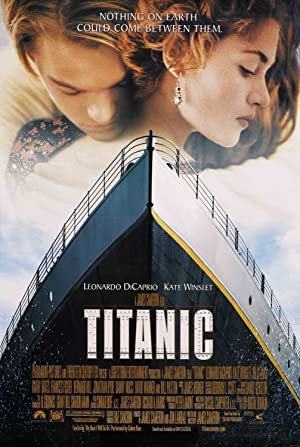

In [30]:
search_movie('Titanic')
show_image('Titanic')
print(' ')

#### 11. Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [31]:
#Testing to see if an error occurs
search_movie('Whatt')
show_image('Whatt')

Retrieving the data for the movie : Whatt... 
Error encountered:  Movie not found!
ERROR!


### 3. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.
a. In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, it has become increasingly difficult to access the free APIs available at Twitter. You are more than welcome to try to use Twitter's API for this portion of the assignment, but please note, there has been some inconsistency experienced when following along with their documentation posted.

b. Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API

In [32]:
#Using the news api to Get and search for news from over 30,000 publications with this simple and free 
#(for non commercial projects) API, you can query by keyword, publication or topic.
url = "https://newsapi.org/v2/everything?"

query = {'q': 'University',
        'from': '2023-05-01',
         'sortBy': 'publishedAt',
        'apiKey': '9cba07dfd3de4b15a3718f9899d8a6fc'}

url = url + urllib.parse.urlencode(query)
with urllib.request.urlopen(url) as url:
    json_data = json.loads(url.read().decode()) #read the response and format to json 
    print(json_data)

{'status': 'ok', 'totalResults': 35802, 'articles': [{'source': {'id': None, 'name': 'Daily Mail'}, 'author': 'Adrian Warren, Shayne Bugden', 'title': 'Aussie boxer Andrew Moloney is brutally knocked out by Junto Nakatani in world title fight', 'description': "His twin brother Jason won the WBO bantamweight title last weekend but Andrew wasn't so lucky, surviving two knockdowns before being knocked out cold by a devastating left hand.", 'url': 'https://www.dailymail.co.uk/sport/boxing/article-12107293/Aussie-boxer-Andrew-Moloney-brutally-knocked-Junto-Nakatani-world-title-fight.html', 'urlToImage': 'https://i.dailymail.co.uk/1s/2023/05/21/04/71227721-0-image-a-5_1684638621440.jpg', 'publishedAt': '2023-05-21T03:18:23Z', 'content': "A game Andrew Moloney was unable to equal the world title-winning achievement of his twin Jason as he was brutally knocked out in the 12th round by Japan's Junto Nakatani in Las Vegas.\r\nMoloney showe… [+2897 chars]"}, {'source': {'id': None, 'name': 'The P

In [33]:
import pandas as pd
news = pd.DataFrame(json_data)
news.head(5)

,status,totalResults,articles
0,ok,35802,"{'source': {'id': None, 'name': 'Daily Mail'},..."
1,ok,35802,"{'source': {'id': None, 'name': 'The Punch'}, ..."
2,ok,35802,"{'source': {'id': 'al-jazeera-english', 'name'..."
3,ok,35802,"{'source': {'id': 'the-jerusalem-post', 'name'..."
4,ok,35802,"{'source': {'id': None, 'name': 'Daily Beast'}..."


### 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line

b. Scatter

c. Bar

d. Histogram

e. Density Plot

f. Pie Chart

Your exercises are due two weeks from Sunday by Midnight of Week 10. Refer to the rubric for more grading detail.

In [34]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Read csv file
housing_df = pd.read_csv("Boston_housing.csv")
housing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Text(0.5, 0, 'TAX')

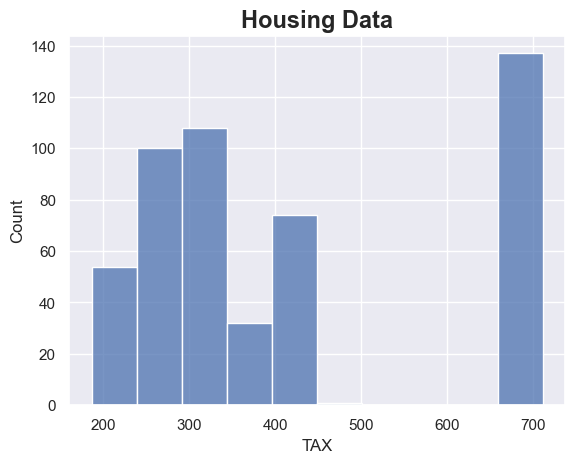

In [36]:
# Histogram

sns.set()
sns.histplot(data=housing_df, x="TAX")
plt.title('Housing Data', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.xlabel('TAX') 

Text(0, 0.5, 'property-tax rate')

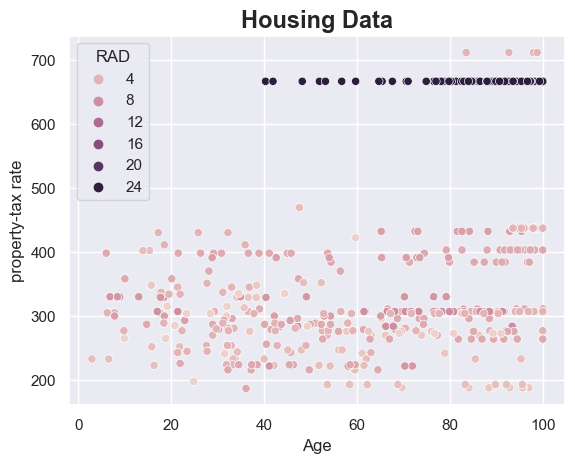

In [37]:
# Scatter plot 
sns.scatterplot(x="AGE",y="TAX",hue="RAD",data=housing_df)
plt.title('Housing Data', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.xlabel('Age')
plt.ylabel('property-tax rate')

Text(0, 0.5, 'Full-value property-tax rate')

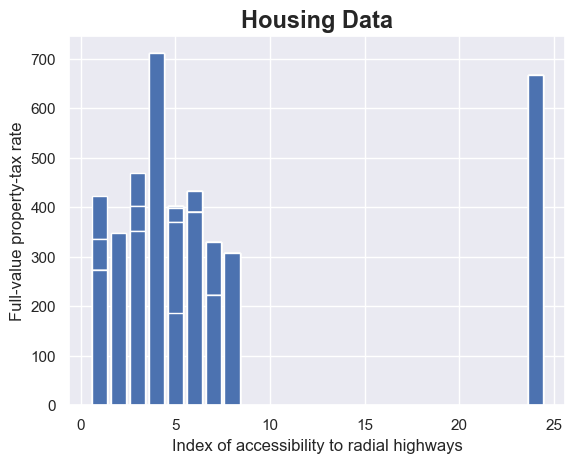

In [38]:
#Bar Chart
plt.bar(housing_df["RAD"], housing_df["TAX"])
plt.title('Housing Data', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Full-value property-tax rate')